In [105]:
import numpy as np
import pandas as pd
import os
import glob
import statsmodels.api as sm
import datetime as dt
import matplotlib.pyplot as plt

# Set display options to show the full DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [106]:
gics_sectors = {
    "10": "Energy", 
    "15": "Materials",
    "20": "Industrials",
    "25": "Consumer Discretionary",
    "30": "Consumer Staples",
    "35": "Healthcare",
    "40": "Financials",
    "45": "Information Technology",
    "50": "Communication Services",
    "55": "Utilities",
    "60": "Real Estate",
    "na" : "Unclassified"
}

gics_industries = {
    "101010": "Energy Equipment & Services",
    "101020": "Oil, Gas & Consumable Fuels",
    "151010": "Chemicals",
    "151020": "Construction Materials",
    "151030": "Containers & Packaging",
    "151040": "Metals & Mining",
    "151050": "Paper & Forest Products",
    "201010": "Aerospace & Defense",
    "201020": "Building Products",
    "201030": "Construction & Engineering",
    "201040": "Electrical Equipment",
    "201050": "Industrial Conglomerates",
    "201060": "Machinery",
    "201070": "Trading Companies & Distributors",
    "202010": "Commercial Services & Supplies",
    "202020": "Professional Services",
    "203010": "Air Freight & Logistics",
    "203020": "Passenger Airlines",
    "203030": "Marine Transportation",
    "203040": "Ground Transportation",
    "203050": "Transportation Infrastructure",
    "251010": "Automobile Components",
    "251020": "Automobiles",
    "252010": "Household Durables",
    "252020": "Leisure Products",
    "252030": "Textiles, Apparel & Luxury Goods",
    "253010": "Hotels, Restaurants & Leisure",
    "253020": "Diversified Consumer Services",
    "255010": "Distributors",
    "255030": "Broadline Retail",
    "255040": "Specialty Retail",
    "301010": "Consumer Staples Distribution & Retail",
    "302010": "Beverages",
    "302020": "Food Products",
    "302030": "Tobacco",
    "303010": "Household Products",
    "303020": "Personal Care Products",
    "351010": "Health Care Equipment & Supplies",
    "351020": "Health Care Providers & Services",
    "351030": "Health Care Technology",
    "352010": "Biotechnology",
    "352020": "Pharmaceuticals",
    "352030": "Life Sciences Tools & Services",
    "401010": "Banks",
    "402010": "Financial Services",
    "402020": "Consumer Finance",
    "402030": "Capital Markets",
    "402040": "Mortgage Real Estate Investment Trusts (REITs)",
    "403010": "Insurance",
    "451020": "IT Services",
    "451030": "Software",
    "452010": "Communications Equipment",
    "452020": "Technology Hardware, Storage & Peripherals",
    "452030": "Electronic Equipment, Instruments & Components",
    "453010": "Semiconductors & Semiconductor Equipment",
    "501010": "Diversified Telecommunication Services",
    "501020": "Wireless Telecommunication Services",
    "502010": "Media",
    "502020": "Entertainment",
    "502030": "Interactive Media & Services",
    "551010": "Electric Utilities",
    "551020": "Gas Utilities",
    "551030": "Multi-Utilities",
    "551040": "Water Utilities",
    "551050": "Independent Power and Renewable Electricity Producers",
    "601010": "Diversified REITs",
    "601025": "Industrial REITs",
    "601030": "Hotel & Resort REITs",
    "601040": "Office REITs",
    "601050": "Health Care REITs",
    "601060": "Residential REITs",
    "601070": "Retail REITs",
    "601080": "Specialized REITs",
    "602010": "Real Estate Management & Development",
    "na" : "Unclassified"
}

In [107]:
def get_sector(gics_code):
    
    if gics_code == np.nan:
        return "na"
    
    gics_code = str(gics_code)
    if gics_code[:2] in gics_sectors:
        return gics_code[:2]
    else:
        return "na"


def get_industry(gics_code):
    
    if gics_code == np.nan:
        return "na"
    
    gics_code = str(gics_code)
    if gics_code[:6] in gics_industries:
        return gics_code[:6]
    else:
        return "na"

In [108]:
folder_path = 'data_us'
files = glob.glob(folder_path + '/*.csv')
print("Files in data_us folder:")
for file in files:
    print(f"{os.path.basename(file)}")

Files in data_us folder:
adjusted.csv
close.csv
dateline.csv
dv.csv
eps.csv
high.csv
in_univ.csv
low.csv
mktcap.csv
open.csv
p2b.csv
recm.csv
tickers.csv
univ_h.csv


In [109]:
df_market_cap = pd.read_csv('data_us/mktcap.csv')
df_market_cap['Date'] = pd.to_datetime(df_market_cap['Date'], format = '%Y%m%d')
df_market_cap.set_index('Date', inplace=True)
df_market_cap.replace(np.nan, 0, inplace=True)


df_tickers = pd.read_csv('data_us/tickers.csv', header=None, dtype= str)
df_tickers.columns = ['ticker', 'gics_code']
df_tickers.set_index('ticker', inplace=True)

df_universe = pd.read_csv('data_us/univ_h.csv')
df_universe.set_index('year', inplace=True)

if "9903115D" in df_market_cap.columns:
    df_market_cap.drop(columns = ['9903115D'], inplace=True)
    
if "9903115D" in df_universe.columns:
    df_universe.drop(columns = ['9903115D'], inplace=True)

In [110]:
df_universe.head()

,0111145D,0202445Q,0203524D,0226226D,0544749D,0574018D,0772031D,0848680D,0867887D,0910150D,0948669D,0961514D,0964591D,1028411Q,1086832D,1255173D,1255459D,1280712D,1281683D,1284849D,1288453D,1288652D,1293405D,1312089D,1317355D,1431816D,1436513D,1448062D,1500785D,1518855D,1519128D,1520415D,1524867D,1528159D,1539941D,1541931D,1566019D,1649858D,1654539D,1683351D,1683997D,1684442D,1697067D,1704453D,1715651D,1719868D,1746513D,1752754D,1799685D,1806854D,1810430D,1812212D,1822785D,1825471D,1831877D,1837572D,1856613D,1858968D,1920486D,1922150D,1927294D,1972693D,1996074D,1996760D,2071296D,2073714D,2078185D,2207158D,2213185D,2217347D,2258717D,2307532Q,2326007D,2326248D,2370058D,2499073D,2502261D,2641504Q,2676187Q,2942331Q,2968900Q,2987536Q,2999130Q,3022239Q,3026360Q,3029830Q,3080867Q,3133754Q,3153670Q,3286728Q,3362726Q,3393199Q,3403545Q,3414924Q,3423152Q,3517233Q,355488Q,3605818Q,3621240Q,3692470Q,4621824Q,502466Q,519239Q,5656565D,605018Q,605555Q,653707Q,723588Q,764144Q,8206908Q,8277831Q,8394653Q,929530Q,945852Q,987200Q,9876544D,9876549D,9876566D,9980328D,9983490D,9990213D,9990253D,9991429D,9995522D,A,AA,AAL,AAP,AAPL,ABBV,ABKFQ,ABMD,ABNB,ABT,ACAS,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,AKS,ALB,ALGN,ALK,ALL,ALLE,ALXN,AMAT,AMCC,AMCR,AMD,AME,AMG,AMGN,AMP,AMT,AMZN,AN,ANDV,ANDW,ANET,ANF,ANRZQ,ANSS,AON,AOS,APA,APC,APD,APH,APOL,APTV,ARE,ARG,ASH,ATGE,ATI,ATO,ATVI,AVB,AVGO,AVP,AVY,AW,AWE,AWK,AXON,AXP,AYE,AYI,AZO,BA,BAC,BALL,BAX,BBBYQ,BBWI,BBY,BC,BCR,BDK,BDX,BEN,BF/B,BFH,BG,BHF,BHI,BIGGQ,BIIB,BIO,BK,BKNG,BKR,BLDR,BLK,BLS,BMC,BMS,BMY,BNI,BOL,BR,BRCM,BRK/B,BRL,BRO,BSX,BTUUQ,BWA,BX,BXLT,BXP,C,CAG,CAH,CAM,CAR,CARR,CAT,CB,CBE,CBOE,CBRE,CCEP,CCI,CCL,CCTYQ,CDAY,CDNS,CDW,CE,CEG,CELG,CEPH,CERN,CF,CFC,CFG,CFN,CHD,CHKAQ,CHRW,CHTR,CI,CIEN,CIN,CINF,CITGQ,CL,CLF,CLX,CMA,CMCSA,CME,CMG,CMI,CMS,CMVT,CMX,CNC,CNP,CNX,COF,COL,COO,COP,COR,COST,COTY,COV,CPAY,CPB,CPGX,CPNLQ,CPPRQ,CPRI,CPRT,CPT,CRL,CRM,CSC,CSCO,CSGP,CSRA,CSX,CTAS,CTB,CTLT,CTRA,CTSH,CTVA,CTXS,CVC,CVG,CVH,CVS,CVX,CXO,CZR,D,DAL,DALRQ,DAY,DCNAQ,DD,DDS,DE,DFODQ,DFS,DG,DGX,DHI,DHR,DIS,DISCA,DISCK,DISH,DJ,DLR,DLTR,DLX,DNRCQ,DOC,DOFSQ,DOV,DOW,DPHIQ,DPZ,DRE,DRI,DTE,DUK,DVA,DVN,DXC,DXCM,DYNIQ,EA,EBAY,ECL,ED,EFX,EG,EIX,EKDKQ,EL,ELV,EMN,EMR,ENDPQ,ENPH,EOG,EOP,EPAM,EQIX,EQR,EQT,ES,ESRX,ESS,ETFC,ETN,ETR,ETSY,EVHC,EVRG,EW,EXC,EXPD,EXPE,EXR,F,FANG,FAST,FBF,FBIN,FCX,FDO,FDS,FDX,FE,FFIV,FHI,FHN,FI,FICO,FIS,FITB,FL,FLIR,FLR,FLS,FLT,FMC,FMCC,FNMA,FOSL,FOX,FOXA,FRCB,FRT,FSH,FSL/B,FSLR,FTI,FTNT,FTRCQ,FTV,GAP,GAS,GD,GDT,GDW,GE,GEHC,GEN,GENZ,GGP,GHC,GILD,GIS,GL,GLW,GM,GMCR,GME,GNRC,GNW,GOOG,GOOGL,GPC,GPN,GR,GRMN,GS,GT,GTW,GWW,HAL,HAR,HAS,HBAN,HBI,HCA,HCBK,HD,HES,HET,HFC,HIG,HII,HLT,HNZ,HOG,HOLX,HON,HOT,HP,HPC,HPE,HPQ,HRB,HRL,HSH,HSIC,HSP,HST,HSY,HUBB,HUM,HWM,IBM,ICE,IDXX,IEX,IFF,ILMN,INCY,INTC,INTU,INVH,IP,IPG,IPGP,IQV,IR,IRM,ISRG,IT,ITT,ITW,IVZ,J,JBHT,JBL,JCI,JEF,JHF,JKHY,JNJ,JNPR,JNS,JNY,JOY,JPM,JWN,K,KATE,KBH,KDP,KEY,KEYS,KG,KHC,KIM,KLAC,KMB,KMI,KMX,KO,KR,KRB,KRFT,KRI,KSE,KSS,KSU,KVUE,L,LDOS,LEG,LEHMQ,LEN,LH,LHX,LIN,LKQ,LLTC,LLY,LM,LMT,LNC,LNT,LO,LOW,LPX,LRCX,LULU,LUMN,LUV,LVLT,LVS,LW,LXK,LYB,LYV,M,MA,MAA,MAC,MAR,MAS,MAT,MBI,MCD,MCHP,MCK,MCO,MDLZ,MDP,MDT,MEE,MEL,MER,MET,META,MFE,MGM,MHK,MHS,MJN,MKC,MKTX,MLM,MMC,MMM,MNKKQ,MNST,MO,MOH,MOLX,MOS,MPC,MPWR,MRK,MRNA,MRO,MS,MSCI,MSFT,MSI,MTB,MTCH,MTD,MTG,MTLQQ,MTW,MU,MUR,MWV,MWW,MXIM,MYL,NAV,NAVI,NBL,NBR,NCC,NCLH,NDAQ,NDSN,NEBLQ,NEE,NEM,NFB,NFLX,NFX,NI,NKE,NKTR,NLSN,NOC,NOV,NOVL,NOW,NRG,NSC,NTAP,NTRS,NUE,NVDA,NVR,NWL,NWS,NWSA,NXPI,NXTL,NYT,O,ODFL,OGN,OI,OKE,OMC,OMX,ON,ORCL,ORLY,OTIS,OXY,PANW,PARA,PAYC,PAYX,PBCT,PBG,PBI,PCAR,PCG,PCL,PCP,PDCO,PEAK,PEG,PENN,PEP,PETM,PFE,PFG,PG,PGL,PGR,PH,PHM,PKG,PLD,PM,PMCS,PNC,PNR,PNW,PODD,POM,POOL,PPG,PPL,PRGO,PRU,PSA,PSX,PTC,PTV,PVH,PVN,PWR,PXD,PYPL,QCOM,QEP,QLGC,QRVO,R,RAI,RBK,RCL,RDC,REG,REGN,RF,RHI,RHT,RIG,RJF,RL,RMD,ROH,ROK,ROL,ROP,ROST,RRC,RRD,RSG,RSHCQ,RTN,RTX,RVTY,RX,SANM,SBAC,SBNY,SBUX,SCG,SCHW,SEBL,SEDG,SEE,SGP,SHLDQ,SHW,SIAL,SIG,SITC,SIVBQ,SJM,SLB,SLG,SLM,SNA,SNDK,SNI,SNPS,SNV,SO,SOV,SPG,SPGI,SPLS,SRCL,S

In [111]:
df_market_cap.head() 

,0111145D,0202445Q,0203524D,0226226D,0544749D,0574018D,0772031D,0848680D,0867887D,0910150D,0948669D,0961514D,0964591D,1028411Q,1086832D,1255173D,1255459D,1280712D,1281683D,1284849D,1288453D,1288652D,1293405D,1312089D,1317355D,1431816D,1436513D,1448062D,1500785D,1518855D,1519128D,1520415D,1524867D,1528159D,1539941D,1541931D,1566019D,1649858D,1654539D,1683351D,1683997D,1684442D,1697067D,1704453D,1715651D,1719868D,1746513D,1752754D,1799685D,1806854D,1810430D,1812212D,1822785D,1825471D,1831877D,1837572D,1856613D,1858968D,1920486D,1922150D,1927294D,1972693D,1996074D,1996760D,2071296D,2073714D,2078185D,2207158D,2213185D,2217347D,2258717D,2307532Q,2326007D,2326248D,2370058D,2499073D,2502261D,2641504Q,2676187Q,2942331Q,2968900Q,2987536Q,2999130Q,3022239Q,3026360Q,3029830Q,3080867Q,3133754Q,3153670Q,3286728Q,3362726Q,3393199Q,3403545Q,3414924Q,3423152Q,3517233Q,355488Q,3605818Q,3621240Q,3692470Q,4621824Q,502466Q,519239Q,5656565D,605018Q,605555Q,653707Q,723588Q,764144Q,8206908Q,8277831Q,8394653Q,929530Q,945852Q,987200Q,9876544D,9876549D,9876566D,9980328D,9983490D,9990213D,9990253D,9991429D,9995522D,A,AA,AAL,AAP,AAPL,ABBV,ABKFQ,ABMD,ABNB,ABT,ACAS,ACGL,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,AKS,ALB,ALGN,ALK,ALL,ALLE,ALXN,AMAT,AMCC,AMCR,AMD,AME,AMG,AMGN,AMP,AMT,AMZN,AN,ANDV,ANDW,ANET,ANF,ANRZQ,ANSS,AON,AOS,APA,APC,APD,APH,APOL,APTV,ARE,ARG,ASH,ATGE,ATI,ATO,ATVI,AVB,AVGO,AVP,AVY,AW,AWE,AWK,AXON,AXP,AYE,AYI,AZO,BA,BAC,BALL,BAX,BBBYQ,BBWI,BBY,BC,BCR,BDK,BDX,BEN,BF/B,BFH,BG,BHF,BHI,BIGGQ,BIIB,BIO,BK,BKNG,BKR,BLDR,BLK,BLS,BMC,BMS,BMY,BNI,BOL,BR,BRCM,BRK/B,BRL,BRO,BSX,BTUUQ,BWA,BX,BXLT,BXP,C,CAG,CAH,CAM,CAR,CARR,CAT,CB,CBE,CBOE,CBRE,CCEP,CCI,CCL,CCTYQ,CDAY,CDNS,CDW,CE,CEG,CELG,CEPH,CERN,CF,CFC,CFG,CFN,CHD,CHKAQ,CHRW,CHTR,CI,CIEN,CIN,CINF,CITGQ,CL,CLF,CLX,CMA,CMCSA,CME,CMG,CMI,CMS,CMVT,CMX,CNC,CNP,CNX,COF,COL,COO,COP,COR,COST,COTY,COV,CPAY,CPB,CPGX,CPNLQ,CPPRQ,CPRI,CPRT,CPT,CRL,CRM,CSC,CSCO,CSGP,CSRA,CSX,CTAS,CTB,CTLT,CTRA,CTSH,CTVA,CTXS,CVC,CVG,CVH,CVS,CVX,CXO,CZR,D,DAL,DALRQ,DAY,DCNAQ,DD,DDS,DE,DFODQ,DFS,DG,DGX,DHI,DHR,DIS,DISCA,DISCK,DISH,DJ,DLR,DLTR,DLX,DNRCQ,DOC,DOFSQ,DOV,DOW,DPHIQ,DPZ,DRE,DRI,DTE,DUK,DVA,DVN,DXC,DXCM,DYNIQ,EA,EBAY,ECL,ED,EFX,EG,EIX,EKDKQ,EL,ELV,EMN,EMR,ENDPQ,ENPH,EOG,EOP,EPAM,EQIX,EQR,EQT,ES,ESRX,ESS,ETFC,ETN,ETR,ETSY,EVHC,EVRG,EW,EXC,EXPD,EXPE,EXR,F,FANG,FAST,FBF,FBIN,FCX,FDO,FDS,FDX,FE,FFIV,FHI,FHN,FI,FICO,FIS,FITB,FL,FLIR,FLR,FLS,FLT,FMC,FMCC,FNMA,FOSL,FOX,FOXA,FRCB,FRT,FSH,FSL/B,FSLR,FTI,FTNT,FTRCQ,FTV,GAP,GAS,GD,GDT,GDW,GE,GEHC,GEN,GENZ,GGP,GHC,GILD,GIS,GL,GLW,GM,GMCR,GME,GNRC,GNW,GOOG,GOOGL,GPC,GPN,GR,GRMN,GS,GT,GTW,GWW,HAL,HAR,HAS,HBAN,HBI,HCA,HCBK,HD,HES,HET,HFC,HIG,HII,HLT,HNZ,HOG,HOLX,HON,HOT,HP,HPC,HPE,HPQ,HRB,HRL,HSH,HSIC,HSP,HST,HSY,HUBB,HUM,HWM,IBM,ICE,IDXX,IEX,IFF,ILMN,INCY,INTC,INTU,INVH,IP,IPG,IPGP,IQV,IR,IRM,ISRG,IT,ITT,ITW,IVZ,J,JBHT,JBL,JCI,JEF,JHF,JKHY,JNJ,JNPR,JNS,JNY,JOY,JPM,JWN,K,KATE,KBH,KDP,KEY,KEYS,KG,KHC,KIM,KLAC,KMB,KMI,KMX,KO,KR,KRB,KRFT,KRI,KSE,KSS,KSU,KVUE,L,LDOS,LEG,LEHMQ,LEN,LH,LHX,LIN,LKQ,LLTC,LLY,LM,LMT,LNC,LNT,LO,LOW,LPX,LRCX,LULU,LUMN,LUV,LVLT,LVS,LW,LXK,LYB,LYV,M,MA,MAA,MAC,MAR,MAS,MAT,MBI,MCD,MCHP,MCK,MCO,MDLZ,MDP,MDT,MEE,MEL,MER,MET,META,MFE,MGM,MHK,MHS,MJN,MKC,MKTX,MLM,MMC,MMM,MNKKQ,MNST,MO,MOH,MOLX,MOS,MPC,MPWR,MRK,MRNA,MRO,MS,MSCI,MSFT,MSI,MTB,MTCH,MTD,MTG,MTLQQ,MTW,MU,MUR,MWV,MWW,MXIM,MYL,NAV,NAVI,NBL,NBR,NCC,NCLH,NDAQ,NDSN,NEBLQ,NEE,NEM,NFB,NFLX,NFX,NI,NKE,NKTR,NLSN,NOC,NOV,NOVL,NOW,NRG,NSC,NTAP,NTRS,NUE,NVDA,NVR,NWL,NWS,NWSA,NXPI,NXTL,NYT,O,ODFL,OGN,OI,OKE,OMC,OMX,ON,ORCL,ORLY,OTIS,OXY,PANW,PARA,PAYC,PAYX,PBCT,PBG,PBI,PCAR,PCG,PCL,PCP,PDCO,PEAK,PEG,PENN,PEP,PETM,PFE,PFG,PG,PGL,PGR,PH,PHM,PKG,PLD,PM,PMCS,PNC,PNR,PNW,PODD,POM,POOL,PPG,PPL,PRGO,PRU,PSA,PSX,PTC,PTV,PVH,PVN,PWR,PXD,PYPL,QCOM,QEP,QLGC,QRVO,R,RAI,RBK,RCL,RDC,REG,REGN,RF,RHI,RHT,RIG,RJF,RL,RMD,ROH,ROK,ROL,ROP,ROST,RRC,RRD,RSG,RSHCQ,RTN,RTX,RVTY,RX,SANM,SBAC,SBNY,SBUX,SCG,SCHW,SEBL,SEDG,SEE,SGP,SHLDQ,SHW,SIAL,SIG,SITC,SIVBQ,SJM,SLB,SLG,SLM,SNA,SNDK,SNI,SNPS,SNV,SO,SOV,SPG,SPGI,SPLS,SRCL,S

In [112]:
df_tickers.tail()

,gics_code
ticker,
YUM,25301040
ZBH,35101010
ZBRA,45203010
ZION,40101015
ZTS,35202010


In [113]:

def get_no_of_stocks(df_universe, df_tickers, year):
    no_of_stocks_sector = {}
    no_of_stocks_industry = {}
    for ticker in df_universe.columns:
        if df_universe.loc[year, ticker] == 1:
            sector = get_sector(df_tickers.loc[ticker, 'gics_code'])
            industry = get_industry(df_tickers.loc[ticker, 'gics_code'])
            if sector in no_of_stocks_sector:
                no_of_stocks_sector[sector] += 1
            else:
                no_of_stocks_sector[sector] = 1
            if industry in no_of_stocks_industry:
                no_of_stocks_industry[industry] += 1
            else:
                no_of_stocks_industry[industry] = 1
    return no_of_stocks_sector, no_of_stocks_industry

In [114]:
no_of_stocks_sector_2014, no_of_stocks_industry_2014  = get_no_of_stocks(df_universe, df_tickers, 2014)
no_of_stocks_sector_2024, no_of_stocks_industry_2024 = get_no_of_stocks(df_universe, df_tickers, 2024)

stocks_df_2014 = pd.DataFrame.from_dict(no_of_stocks_sector_2014, orient='index', columns=['2014 Stocks'])
stocks_df_2024 = pd.DataFrame.from_dict(no_of_stocks_sector_2024, orient='index', columns=['2024 Stocks'])
sector_df = pd.DataFrame.from_dict(gics_sectors, orient='index', columns=['Sectors'])

sector_df = pd.concat([sector_df, stocks_df_2014, stocks_df_2024], axis=1).sort_index()
sector_df.fillna(0, inplace=True)
sector_df.index.name = 'GICS Code'

sector_df

,Sectors,2014 Stocks,2024 Stocks
GICS Code,,,
10,Energy,45,23.0
15,Materials,31,28.0
20,Industrials,64,78.0
25,Consumer Discretionary,62,53.0
30,Consumer Staples,41,38.0
35,Healthcare,55,64.0
40,Financials,66,71.0
45,Information Technology,50,64.0
50,Communication Services,26,22.0


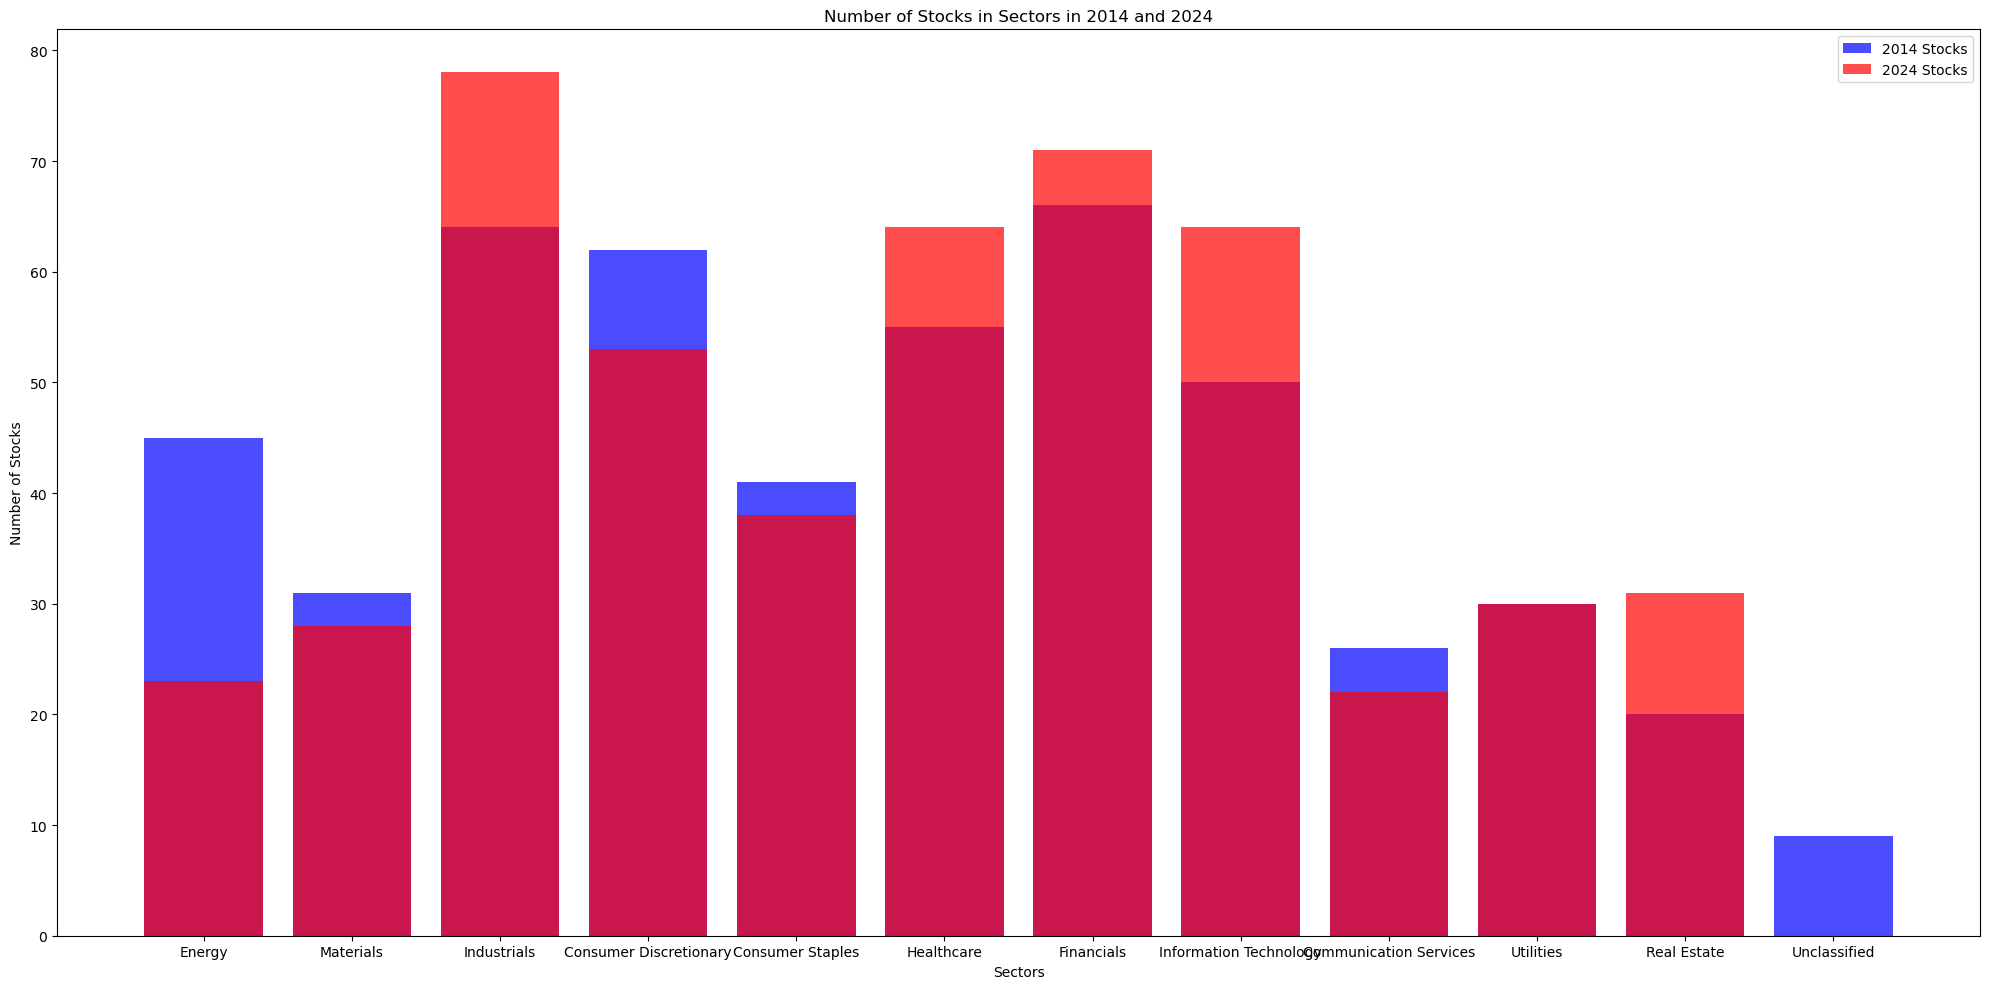

In [115]:
plt.figure(figsize=(20, 10))
plt.bar(sector_df['Sectors'], sector_df['2014 Stocks'], color='b', alpha=0.7, label='2014 Stocks')
plt.bar(sector_df['Sectors'], sector_df['2024 Stocks'], color='r', alpha=0.7, label='2024 Stocks')
plt.xlabel('Sectors')
plt.ylabel('Number of Stocks')
plt.title('Number of Stocks in Sectors in 2014 and 2024')
plt.tight_layout()
plt.legend()
plt.show()

In [116]:
industry_df_2014 = pd.DataFrame.from_dict(no_of_stocks_industry_2014, orient='index', columns=['2014 Stocks'])
industry_df_2024 = pd.DataFrame.from_dict(no_of_stocks_industry_2024, orient='index', columns=['2024 Stocks'])
industry_sector = pd.DataFrame.from_dict(gics_industries, orient='index', columns=['Industries'])

industry_df = pd.concat([industry_sector, industry_df_2014, industry_df_2024], axis=1).sort_index()
industry_df.fillna(0, inplace=True)
industry_df.index.name = 'GICS Code'

industry_df

,Industries,2014 Stocks,2024 Stocks
GICS Code,,,
101010,Energy Equipment & Services,13.0,3.0
101020,"Oil, Gas & Consumable Fuels",32.0,20.0
151010,Chemicals,16.0,16.0
151020,Construction Materials,1.0,2.0
151030,Containers & Packaging,7.0,6.0
151040,Metals & Mining,7.0,4.0
151050,Paper & Forest Products,0.0,0.0
201010,Aerospace & Defense,12.0,12.0
201020,Building Products,4.0,7.0


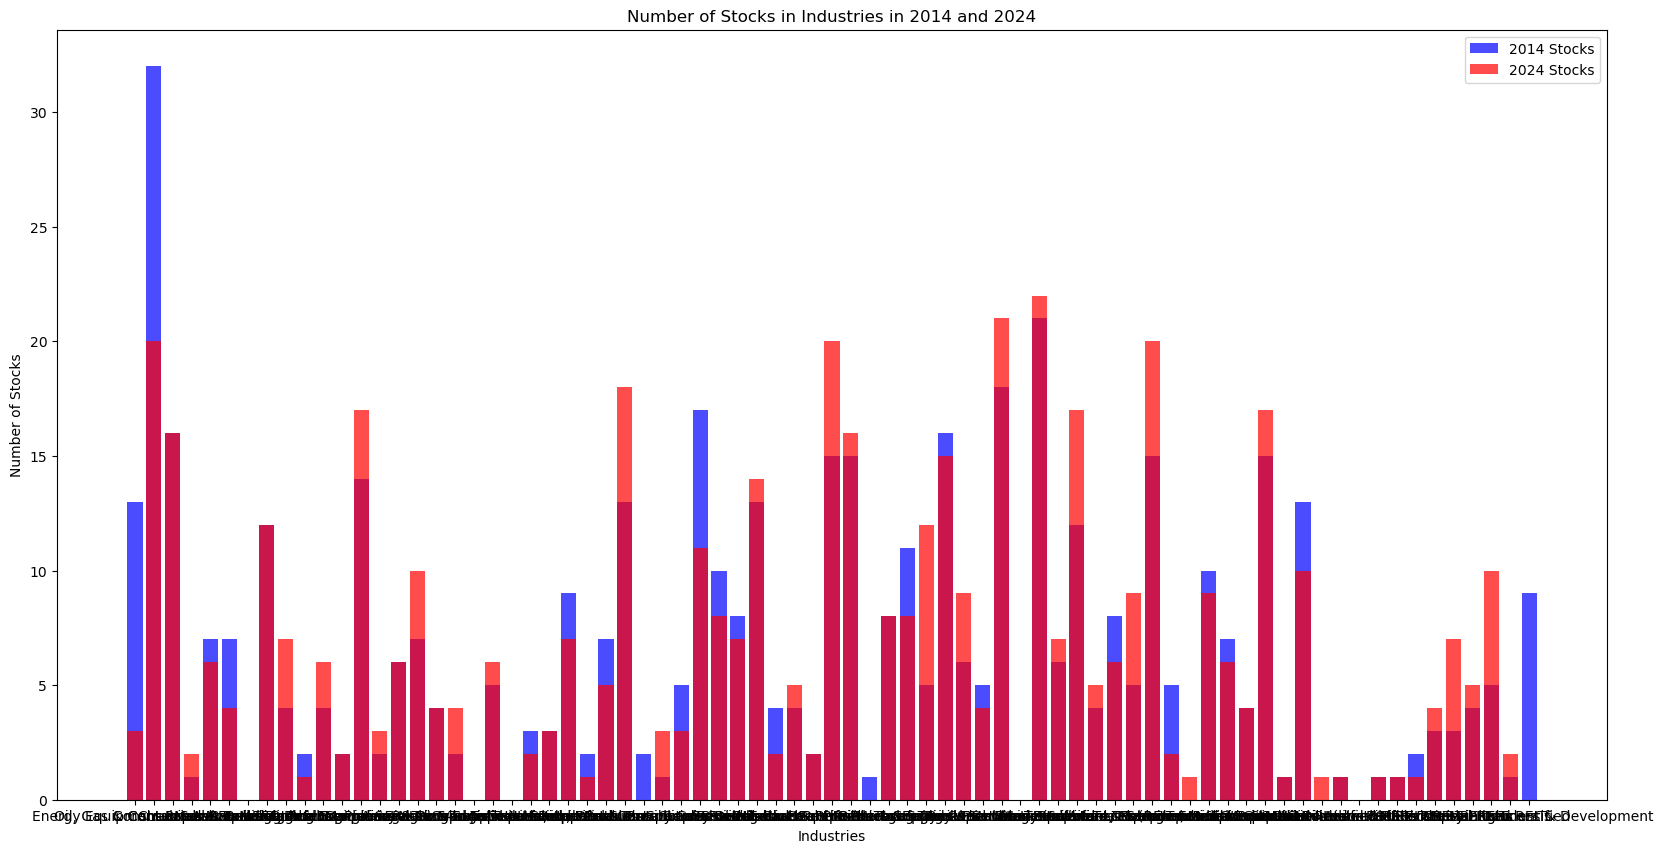

In [117]:
plt.figure(figsize=(20, 10))
plt.bar(industry_df['Industries'], industry_df['2014 Stocks'], color='b', alpha=0.7, label='2014 Stocks')
plt.bar(industry_df['Industries'], industry_df['2024 Stocks'], color='r', alpha=0.7, label='2024 Stocks')
plt.xlabel('Industries')
plt.ylabel('Number of Stocks')
plt.title('Number of Stocks in Industries in 2014 and 2024')
plt.legend()
plt.show()

In [118]:
def get_market_cap(df_market_cap, df_universe, df_tickers, date):
    year = date.year
    market_cap_sector = {}
    market_cap_industry = {}
    for ticker in df_universe.columns:
        if df_universe.loc[year, ticker] == 1:
            sector = get_sector(df_tickers.loc[ticker, 'gics_code'])
            industry = get_industry(df_tickers.loc[ticker, 'gics_code'])
            market_cap = df_market_cap.loc[date, ticker]
            # if market_cap == 0:
            #     print(f"Market Cap is 0 for {ticker} on {date}")
            if sector in market_cap_sector:
                market_cap_sector[sector] += market_cap
            else:
                market_cap_sector[sector] = market_cap
            if industry in market_cap_industry:
                market_cap_industry[industry] += market_cap
            else:
                market_cap_industry[industry] = market_cap
    return market_cap_sector, market_cap_industry

In [119]:
market_cap_sector_2014, market_cap_industry_2014 = get_market_cap(df_market_cap, df_universe, df_tickers, dt.datetime(2014, 1, 2))
market_cap_sector_2024, market_cap_industry_2024 = get_market_cap(df_market_cap, df_universe, df_tickers, dt.datetime(2024, 1, 2))


sectors_df_2014 = pd.DataFrame.from_dict(market_cap_sector_2014, orient='index', columns=['2014 Market Cap'])
sectors_df_2024 = pd.DataFrame.from_dict(market_cap_sector_2024, orient='index', columns=['2024 Market Cap'])
sector_df = pd.DataFrame.from_dict(gics_sectors, orient='index', columns=['Sectors'])

sector_df_2014 = pd.concat([sector_df, sectors_df_2014], axis=1).sort_index()
sector_df_2024 = pd.concat([sector_df, sectors_df_2024], axis=1).sort_index()

sector_df_2014.index.name = 'GICS Code'
sector_df_2014.fillna(0, inplace=True)

sector_df_2024.index.name = 'GICS Code'
sector_df_2024.fillna(0, inplace=True)

sector_df_2014

,Sectors,2014 Market Cap
GICS Code,,
10,Energy,1.714223e+06
15,Materials,5.929685e+05
20,Industrials,1.851276e+06
25,Consumer Discretionary,1.505581e+06
30,Consumer Staples,1.787060e+06
35,Healthcare,2.259201e+06
40,Financials,2.783578e+06
45,Information Technology,2.318796e+06
50,Communication Services,1.595571e+06


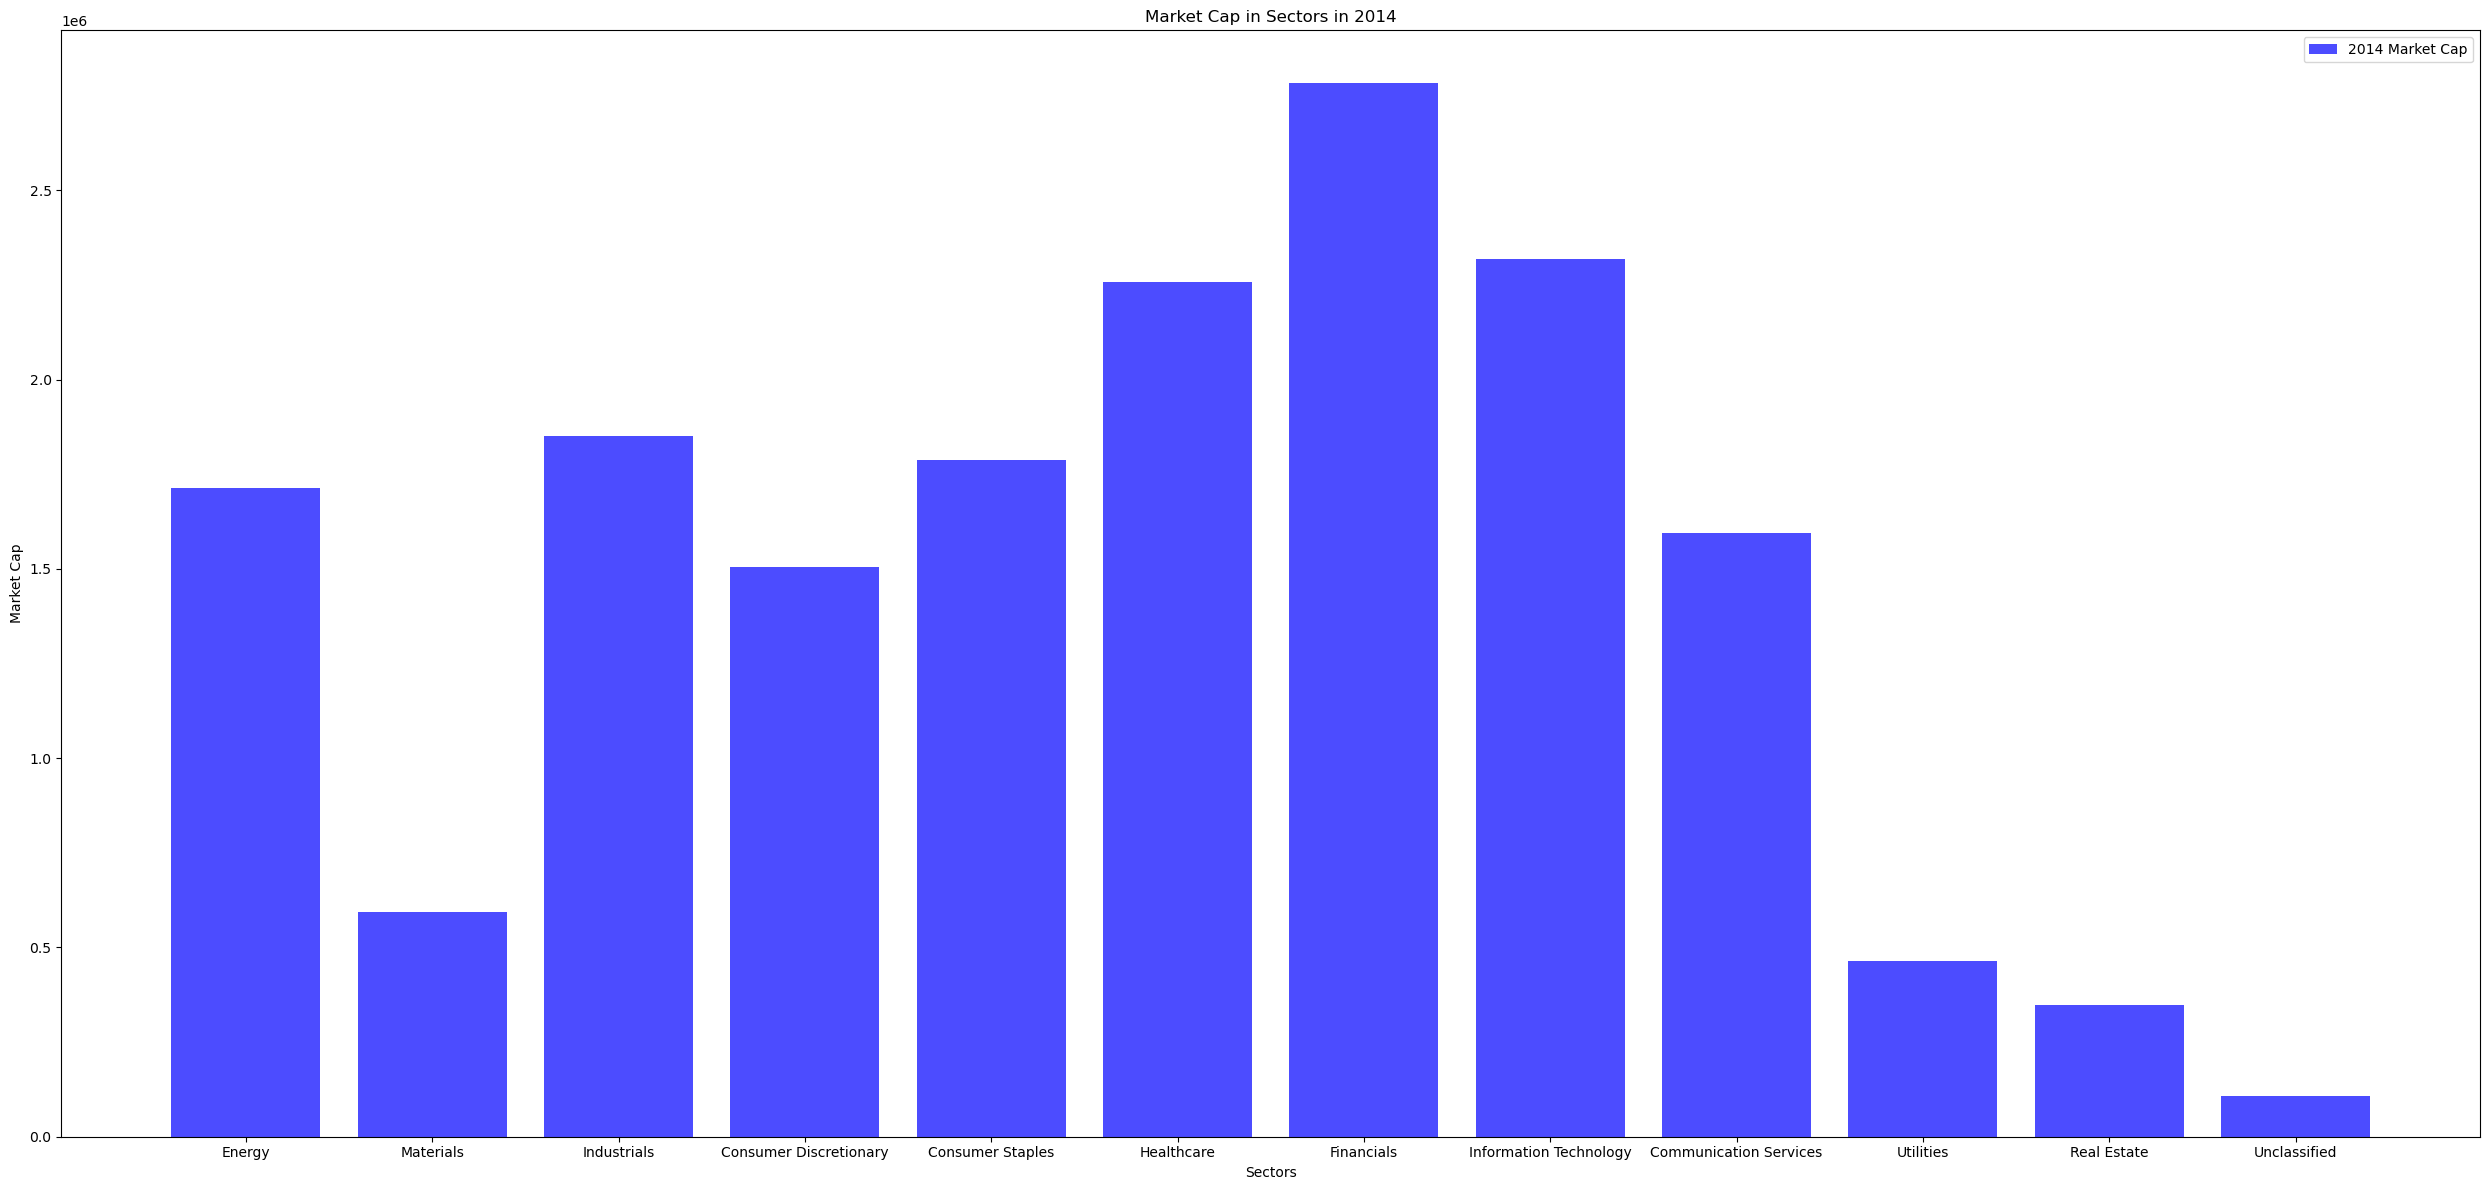

In [120]:
plt.figure(figsize=(25, 12))
plt.bar(sector_df_2014['Sectors'], sector_df_2014['2014 Market Cap'], color='b', alpha=0.7, label='2014 Market Cap')
plt.xlabel('Sectors')
plt.ylabel('Market Cap')
plt.title('Market Cap in Sectors in 2014')
plt.tight_layout()
plt.legend()

In [121]:
sector_df_2024

,Sectors,2024 Market Cap
GICS Code,,
10,Energy,1.617214e+06
15,Materials,9.835474e+05
20,Industrials,3.648384e+06
25,Consumer Discretionary,4.720285e+06
30,Consumer Staples,2.856263e+06
35,Healthcare,5.312224e+06
40,Financials,5.644230e+06
45,Information Technology,1.162882e+07
50,Communication Services,5.669720e+06


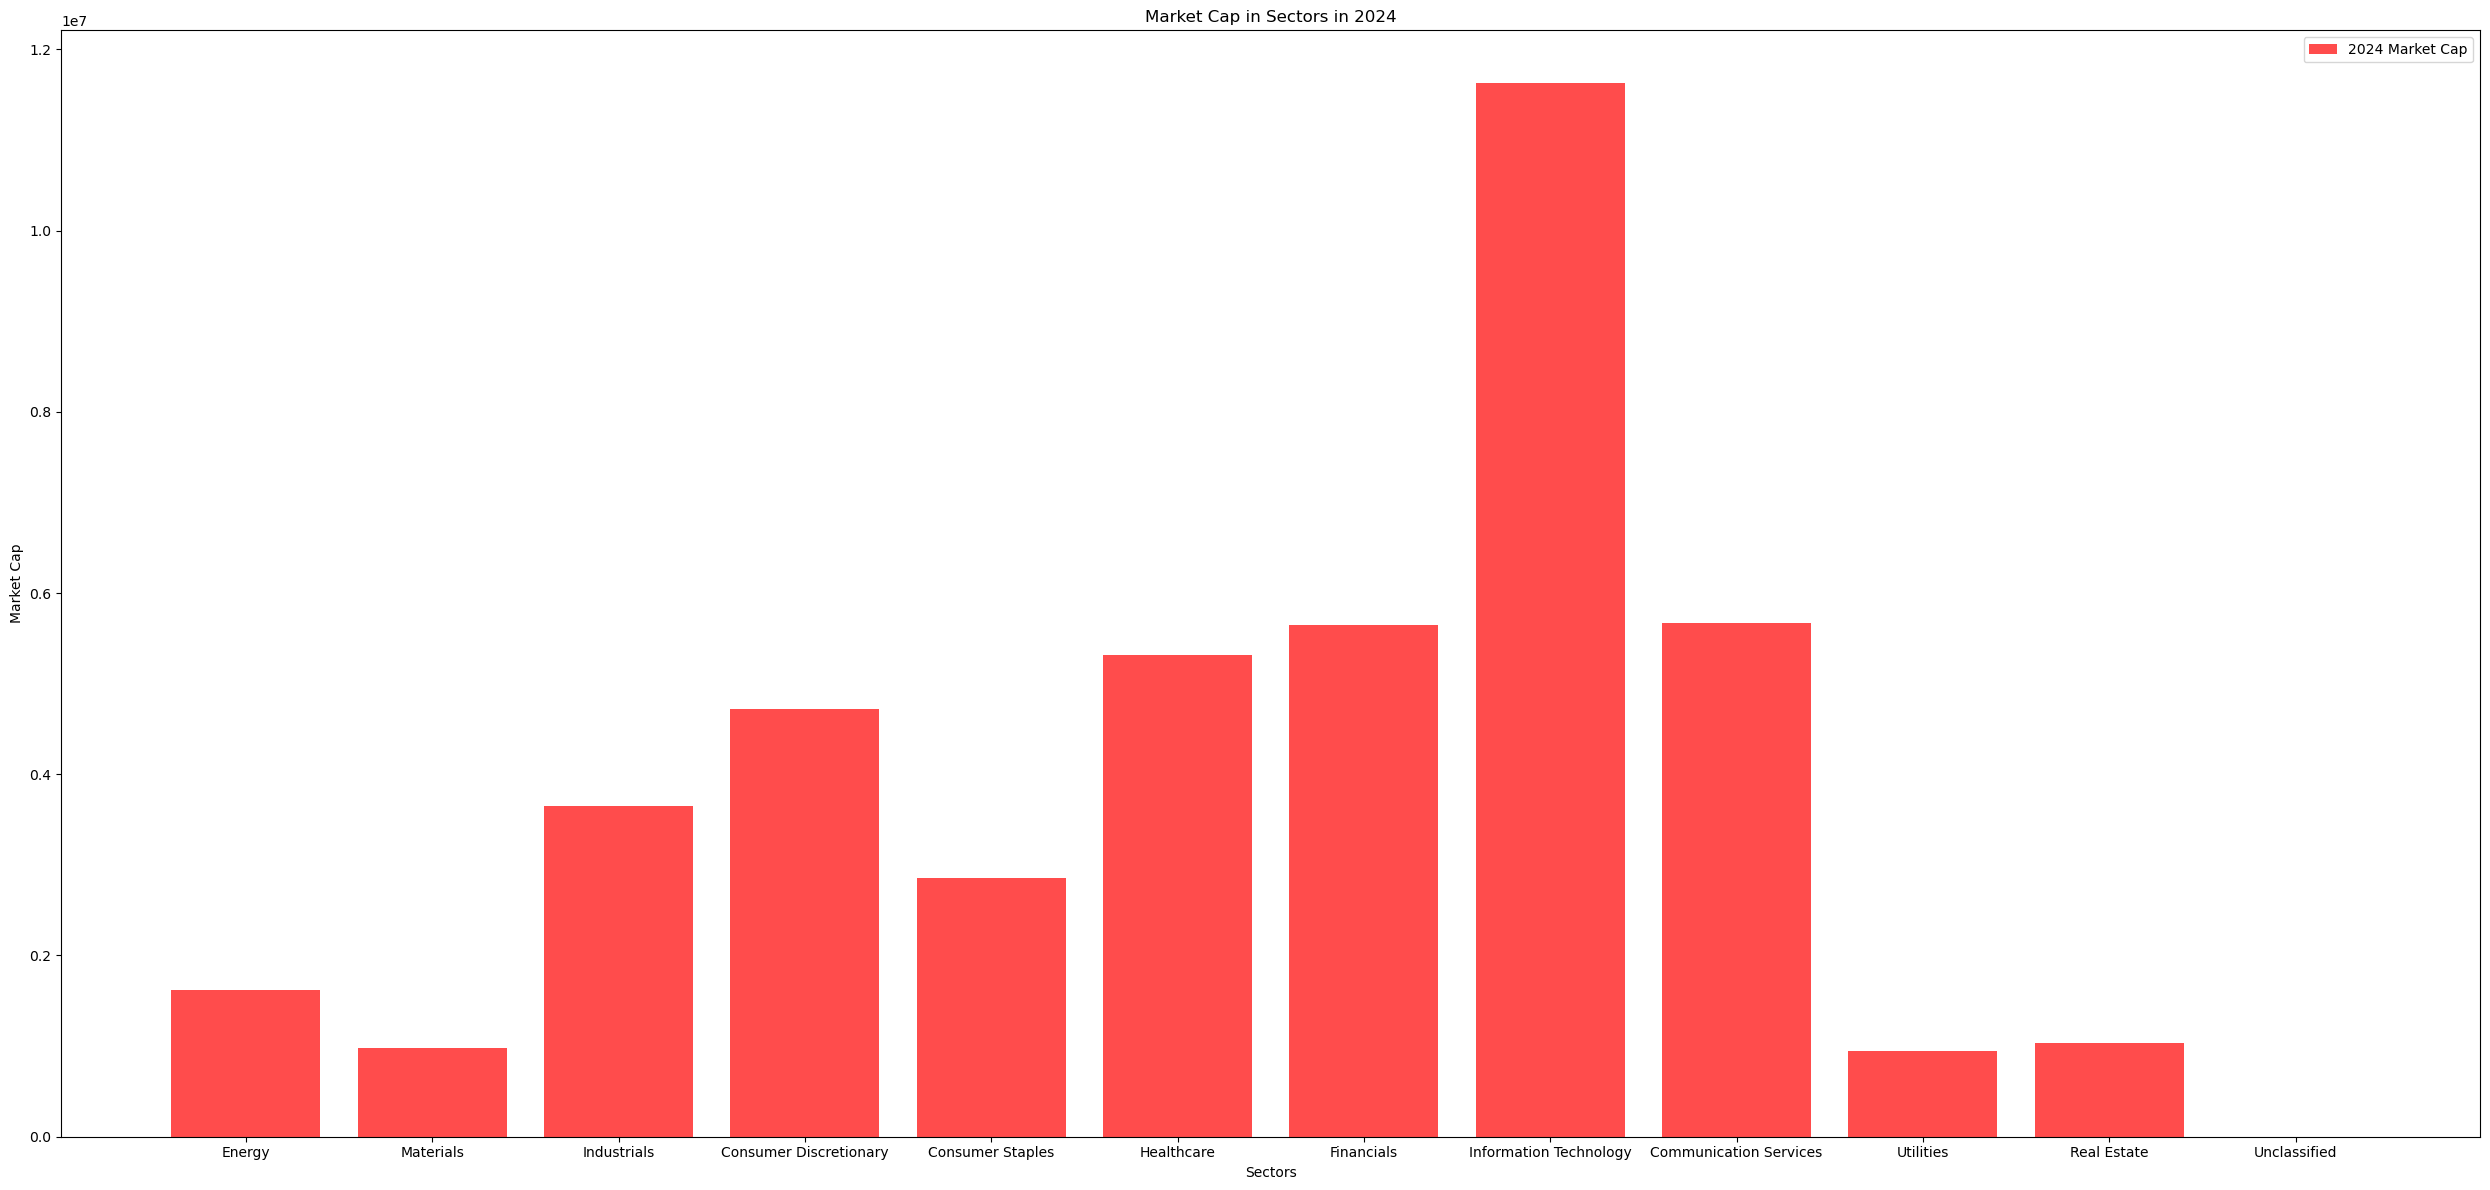

In [122]:
plt.figure(figsize=(25, 12))
plt.bar(sector_df_2024['Sectors'], sector_df_2024['2024 Market Cap'], color='r', alpha=0.7, label='2024 Market Cap')
plt.xlabel('Sectors')
plt.ylabel('Market Cap')
plt.title('Market Cap in Sectors in 2024')
plt.tight_layout()
plt.legend()

In [123]:
industries_df_2014 = pd.DataFrame.from_dict(market_cap_industry_2014, orient='index', columns=['2014 Market Cap'])
industries_df_2024 = pd.DataFrame.from_dict(market_cap_industry_2024, orient='index', columns=['2024 Market Cap'])
industry_sector = pd.DataFrame.from_dict(gics_industries, orient='index', columns=['Industries'])

industry_df_2014 = pd.concat([industry_sector, industries_df_2014], axis=1).sort_index()
industry_df_2014.index.name = 'GICS Code'
industry_df_2014.fillna(0, inplace=True)

industry_df_2024 = pd.concat([industry_sector, industries_df_2024], axis=1).sort_index()
industry_df_2024.index.name = 'GICS Code'
industry_df_2024.fillna(0, inplace=True)

industry_df_2014

,Industries,2014 Market Cap
GICS Code,,
101010,Energy Equipment & Services,3.092753e+05
101020,"Oil, Gas & Consumable Fuels",1.404948e+06
151010,Chemicals,4.370599e+05
151020,Construction Materials,7.627782e+03
151030,Containers & Packaging,5.708406e+04
151040,Metals & Mining,9.119681e+04
151050,Paper & Forest Products,0.000000e+00
201010,Aerospace & Defense,6.930705e+05
201020,Building Products,4.886080e+04


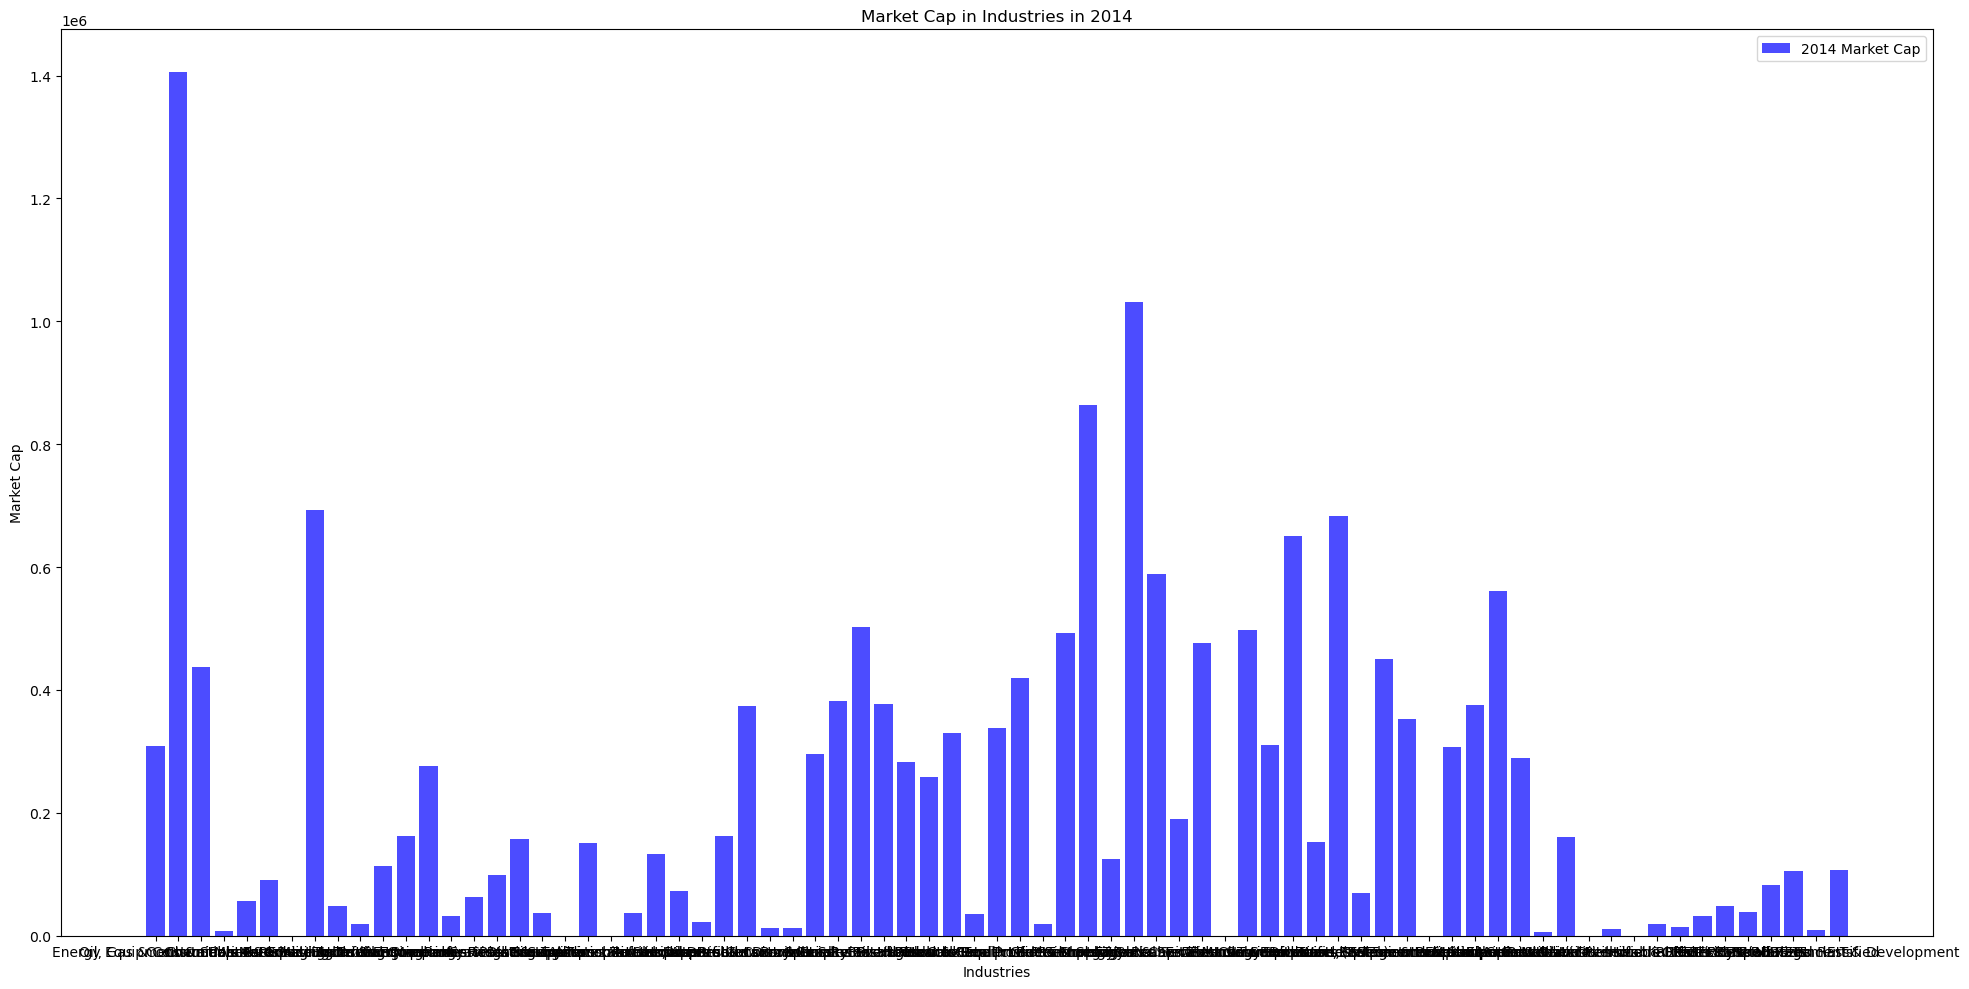

In [124]:
plt.figure(figsize=(20, 10))
plt.bar(industry_df_2014['Industries'], industry_df_2014['2014 Market Cap'], color='b', alpha=0.7, label='2014 Market Cap')
plt.xlabel('Industries')
plt.ylabel('Market Cap')
plt.title('Market Cap in Industries in 2014')
plt.tight_layout()
plt.legend()
plt.show()

In [125]:
industry_df_2024

,Industries,2024 Market Cap
GICS Code,,
101010,Energy Equipment & Services,1.404602e+05
101020,"Oil, Gas & Consumable Fuels",1.476754e+06
151010,Chemicals,6.674275e+05
151020,Construction Materials,6.005966e+04
151030,Containers & Packaging,8.618661e+04
151040,Metals & Mining,1.698737e+05
151050,Paper & Forest Products,0.000000e+00
201010,Aerospace & Defense,8.282694e+05
201020,Building Products,2.026461e+05


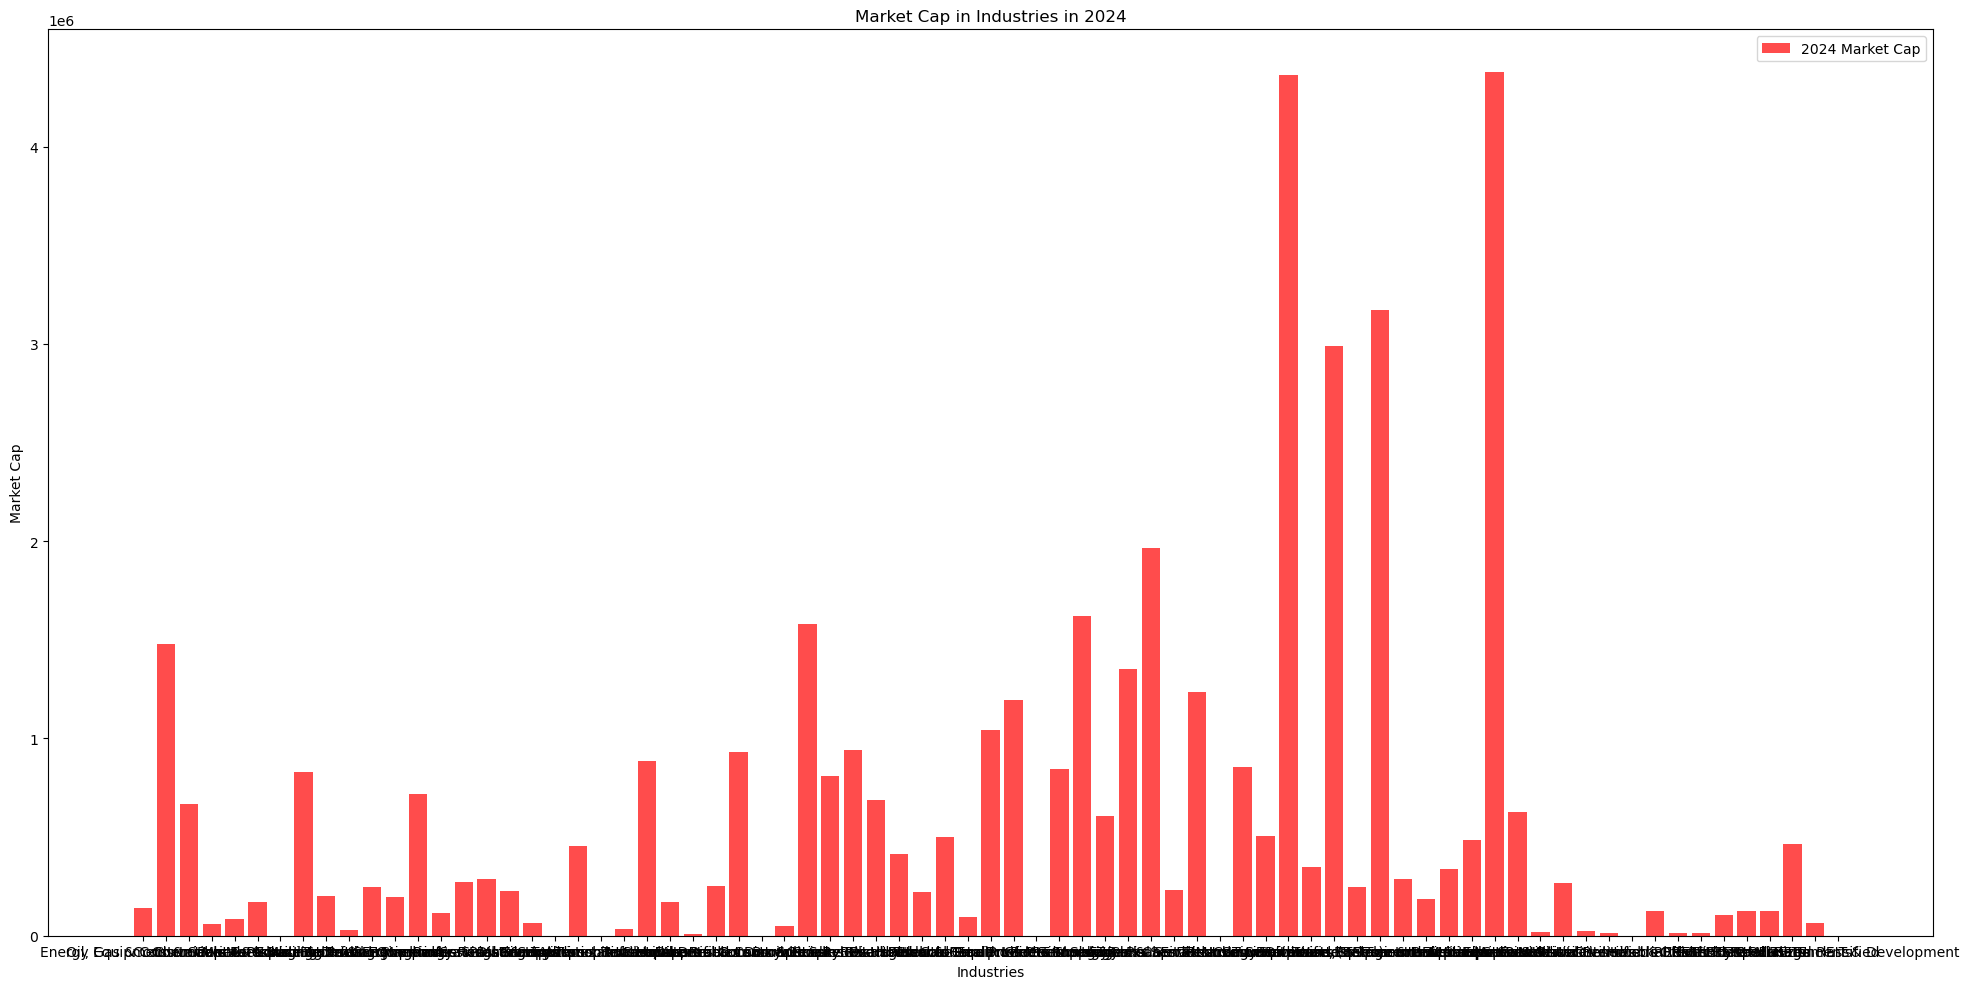

In [126]:
plt.figure(figsize=(20, 10))
plt.bar(industry_df_2024['Industries'], industry_df_2024['2024 Market Cap'], color='r', alpha=0.7, label='2024 Market Cap')
plt.xlabel('Industries')
plt.ylabel('Market Cap')
plt.title('Market Cap in Industries in 2024')
plt.legend()
plt.tight_layout()
plt.show()

In [127]:
# select top 3 sectors by market cap
top_sectors_2014 = sector_df_2014.nlargest(3, '2014 Market Cap')
top_sectors_2024 = sector_df_2024.nlargest(3, '2024 Market Cap')

top_sectors_2014

,Sectors,2014 Market Cap
GICS Code,,
40,Financials,2.783578e+06
45,Information Technology,2.318796e+06
35,Healthcare,2.259201e+06


In [128]:
top_sectors_2024

,Sectors,2024 Market Cap
GICS Code,,
45,Information Technology,1.162882e+07
50,Communication Services,5.669720e+06
40,Financials,5.644230e+06


In [129]:
# select top 3 industries by market cap
top_industries_2014 = industry_df_2014.nlargest(3, '2014 Market Cap')
top_industries_2024 = industry_df_2024.nlargest(3, '2024 Market Cap')

top_industries_2014

,Industries,2014 Market Cap
GICS Code,,
101020,"Oil, Gas & Consumable Fuels",1.404948e+06
401010,Banks,1.031024e+06
352020,Pharmaceuticals,8.638156e+05


In [130]:
top_industries_2024

,Industries,2024 Market Cap
GICS Code,,
502030,Interactive Media & Services,4.375615e+06
451030,Software,4.364983e+06
453010,Semiconductors & Semiconductor Equipment,3.171491e+06


In [131]:
nvda_gics_code = df_tickers.loc['NVDA']['gics_code']

nvda_industry = get_industry(nvda_gics_code)

In [132]:
nvda_industry_stocks = []

for ticker in df_universe.columns:
    if df_universe.loc[2024][ticker]:
        try:
            gics_code = df_tickers.loc[ticker]['gics_code']
        except:
            gics_code = 'na'
        
        industry = get_industry(gics_code)
        
        if industry == nvda_industry:
            nvda_industry_stocks.append(ticker)

nvda_industry_stocks

['ADI',
 'AMAT',
 'AMD',
 'AVGO',
 'ENPH',
 'FSLR',
 'INTC',
 'KLAC',
 'LRCX',
 'MCHP',
 'MPWR',
 'MU',
 'NVDA',
 'NXPI',
 'ON',
 'QCOM',
 'QRVO',
 'SWKS',
 'TER',
 'TXN']

In [133]:
df_stocks_close = pd.read_csv('data_us/adjusted.csv')
df_stocks_close['Date'] = pd.to_datetime(df_stocks_close['Date'], format = '%Y%m%d')
df_stocks_close.set_index('Date', inplace=True)

start_date = '2019-12-31'
end_date = '2024-12-31'

df_stocks_close = df_stocks_close.loc[start_date:end_date]

df_nvda_industry_close = df_stocks_close[nvda_industry_stocks]

df_nvda_industry_close.head()

,ADI,AMAT,AMD,AVGO,ENPH,FSLR,INTC,KLAC,LRCX,MCHP,MPWR,MU,NVDA,NXPI,ON,QCOM,QRVO,SWKS,TER,TXN
Date,,,,,,,,,,,,,,,,,,,,
2019-12-31,108.4613,58.2540,45.86,27.433,26.13,55.96,52.7952,167.2443,27.4870,48.1698,171.6372,52.6450,5.8580,117.2639,24.38,78.9728,116.23,109.0678,66.7716,111.6276
2020-01-02,109.9125,59.3611,49.10,27.986,29.34,57.24,53.6685,171.3745,28.0031,49.4946,173.5558,54.2211,5.9727,118.4434,25.06,79.3845,115.96,109.7806,68.2306,112.7414
2020-01-03,107.9776,58.4163,48.60,27.274,29.29,57.02,53.0157,168.0985,27.7023,48.4090,170.4127,53.3792,5.8771,117.3008,24.69,77.8897,112.34,107.0557,66.8107,111.2448
2020-01-06,106.7090,57.1565,48.39,27.234,29.66,55.83,52.8657,164.3156,27.1853,47.7145,168.6676,52.4346,5.9018,116.4715,24.07,77.4332,111.64,105.1699,65.3615,110.4704
2020-01-07,109.1367,58.8076,48.25,27.140,29.99,56.67,51.9836,165.6204,27.8480,50.9160,170.2392,57.0403,5.9732,117.9827,24.66,79.6351,111.23,106.1715,66.8009,112.6022


In [134]:
df_nvda_industry_returns = df_nvda_industry_close.pct_change().dropna()

df_nvda_industry_returns.head()

,ADI,AMAT,AMD,AVGO,ENPH,FSLR,INTC,KLAC,LRCX,MCHP,MPWR,MU,NVDA,NXPI,ON,QCOM,QRVO,SWKS,TER,TXN
Date,,,,,,,,,,,,,,,,,,,,
2020-01-02,0.013380,0.019005,0.070650,0.020158,0.122847,0.022873,0.016541,0.024696,0.018776,0.027503,0.011178,0.029938,0.019580,0.010059,0.027892,0.005213,-0.002323,0.006535,0.021851,0.009978
2020-01-03,-0.017604,-0.015916,-0.010183,-0.025441,-0.001704,-0.003843,-0.012164,-0.019116,-0.010742,-0.021934,-0.018110,-0.015527,-0.016006,-0.009647,-0.014765,-0.018830,-0.031218,-0.024821,-0.020810,-0.013275
2020-01-06,-0.011749,-0.021566,-0.004321,-0.001467,0.012632,-0.020870,-0.002829,-0.022504,-0.018663,-0.014347,-0.010240,-0.017696,0.004203,-0.007070,-0.025111,-0.005861,-0.006231,-0.017615,-0.021691,-0.006961
2020-01-07,0.022751,0.028887,-0.002893,-0.003452,0.011126,0.015046,-0.016686,0.007941,0.024377,0.067097,0.009318,0.087837,0.012098,0.012975,0.024512,0.028436,-0.003673,0.009524,0.022022,0.019297
2020-01-08,0.009032,-0.000650,-0.008705,-0.012491,0.033678,0.000529,0.000679,0.001304,0.012593,-0.012648,-0.001303,-0.012872,0.001875,0.002499,0.006488,-0.002922,0.015194,0.015891,0.001174,0.002704


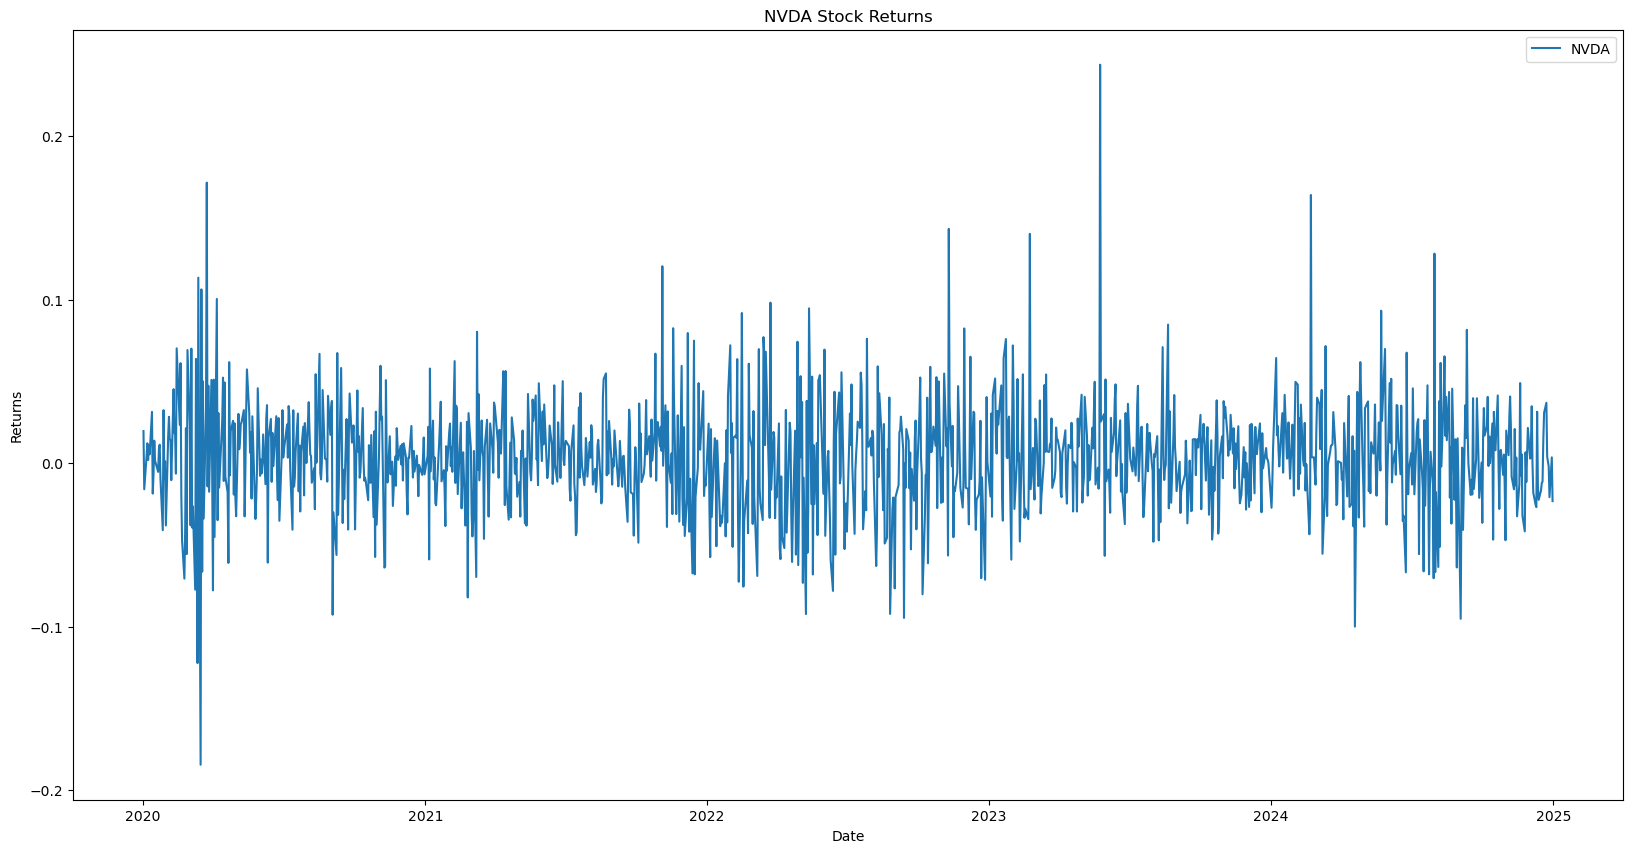

In [135]:
plt.figure(figsize=(20, 10))
plt.plot(df_nvda_industry_returns.index, df_nvda_industry_returns['NVDA'], label='NVDA')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('NVDA Stock Returns')
plt.legend()
plt.show()

In [136]:
df_nvda_industry_log_returns = np.log(1 + df_nvda_industry_returns)

df_nvda_industry_log_returns_industry = df_nvda_industry_log_returns.mean(axis = 1)

df_nvda_industry_log_returns.head()

,ADI,AMAT,AMD,AVGO,ENPH,FSLR,INTC,KLAC,LRCX,MCHP,MPWR,MU,NVDA,NXPI,ON,QCOM,QRVO,SWKS,TER,TXN
Date,,,,,,,,,,,,,,,,,,,,
2020-01-02,0.013291,0.018826,0.068266,0.019958,0.115868,0.022616,0.016406,0.024396,0.018602,0.027131,0.011116,0.029499,0.019391,0.010008,0.027510,0.005200,-0.002326,0.006514,0.021615,0.009928
2020-01-03,-0.017761,-0.016044,-0.010236,-0.025771,-0.001706,-0.003851,-0.012238,-0.019301,-0.010800,-0.022178,-0.018276,-0.015649,-0.016136,-0.009694,-0.014875,-0.019009,-0.031715,-0.025135,-0.021030,-0.013364
2020-01-06,-0.011818,-0.021802,-0.004330,-0.001468,0.012553,-0.021091,-0.002833,-0.022761,-0.018839,-0.014450,-0.010293,-0.017854,0.004194,-0.007095,-0.025432,-0.005878,-0.006251,-0.017772,-0.021930,-0.006986
2020-01-07,0.022496,0.028478,-0.002897,-0.003458,0.011065,0.014934,-0.016826,0.007909,0.024085,0.064942,0.009275,0.084191,0.012025,0.012891,0.024216,0.028039,-0.003679,0.009479,0.021783,0.019114
2020-01-08,0.008991,-0.000650,-0.008743,-0.012569,0.033123,0.000529,0.000679,0.001303,0.012515,-0.012729,-0.001304,-0.012955,0.001873,0.002496,0.006467,-0.002926,0.015079,0.015766,0.001173,0.002701


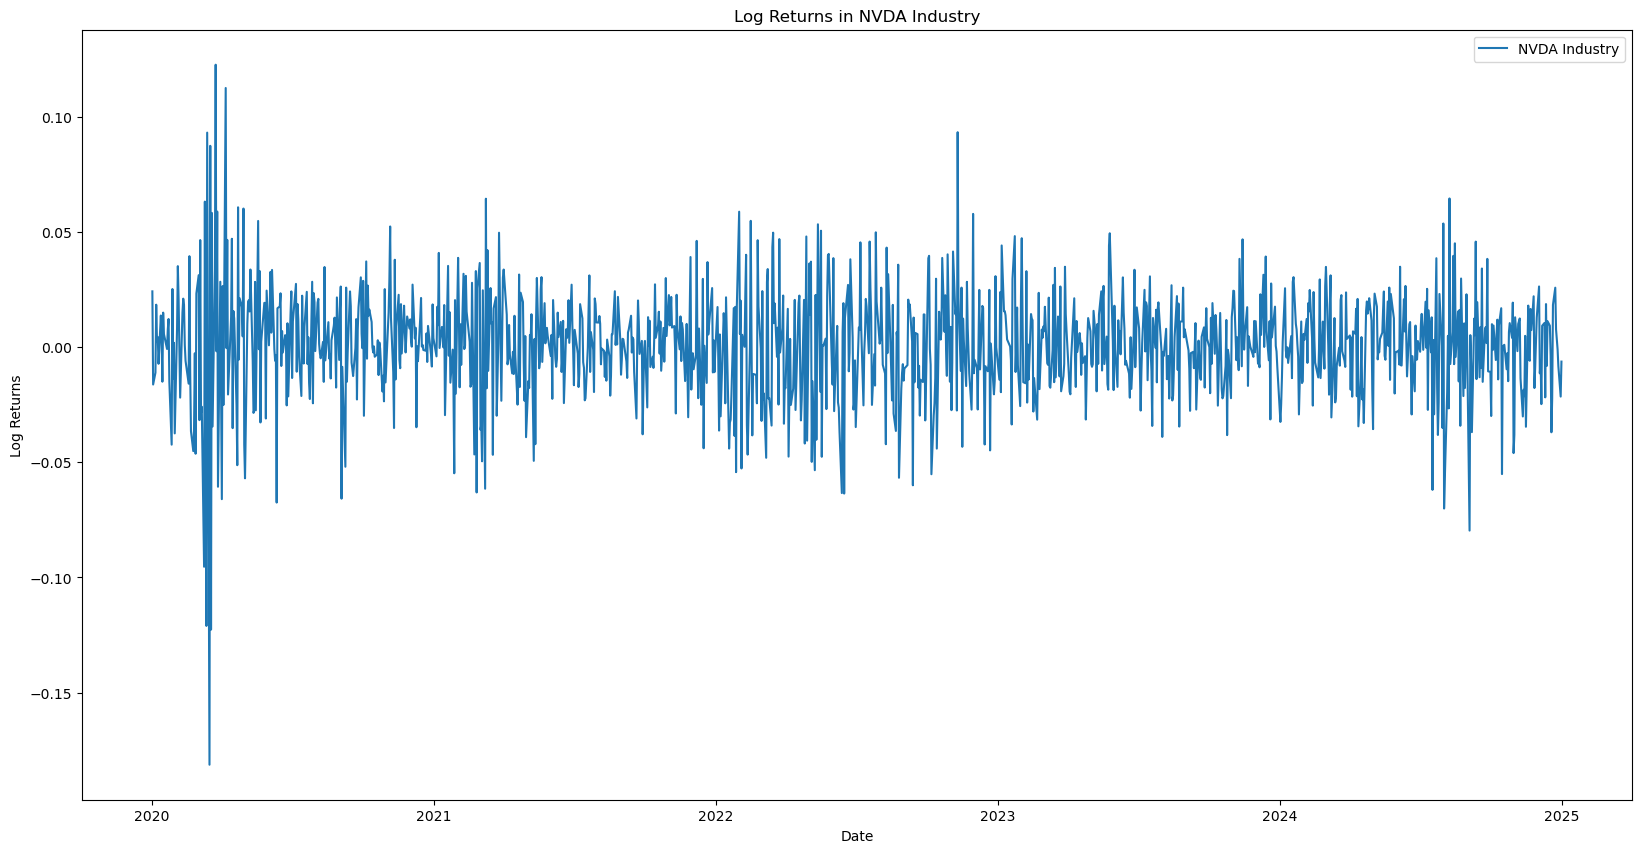

In [137]:
plt.figure(figsize=(20, 10))
plt.plot(df_nvda_industry_log_returns_industry.index, df_nvda_industry_log_returns_industry, label='NVDA Industry')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.title('Log Returns in NVDA Industry')
plt.legend()
plt.show()

In [138]:
X = sm.add_constant(df_nvda_industry_log_returns_industry)

model = sm.OLS(df_nvda_industry_log_returns['NVDA'], X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   NVDA   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     2104.
Date:                Sat, 01 Feb 2025   Prob (F-statistic):          1.26e-270
Time:                        03:01:24   Log-Likelihood:                 3099.2
No. Observations:                1258   AIC:                            -6194.
Df Residuals:                    1256   BIC:                            -6184.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0018      0.001      3.076      0.0

In [ ]:
start_date = '2020-01-02'
end_date = '2024-12-31'

df_market_cap_nvda_industry = df_market_cap.loc[start_date:end_date][nvda_industry_stocks]

df_weighted_returns = df_market_cap_nvda_industry*df_nvda_industry_log_returns

df_weighted_returns = df_weighted_returns.sum(axis=1)/df_market_cap_nvda_industry.sum(axis=1)

df_weighted_returns = df_weighted_returns.to_frame(name='Weighted Returns')

df_weighted_returns.head()

,Weighted Returns
Date,
2020-01-02,0.0
2020-01-03,0.0
2020-01-06,0.0
2020-01-07,0.0
2020-01-08,0.0


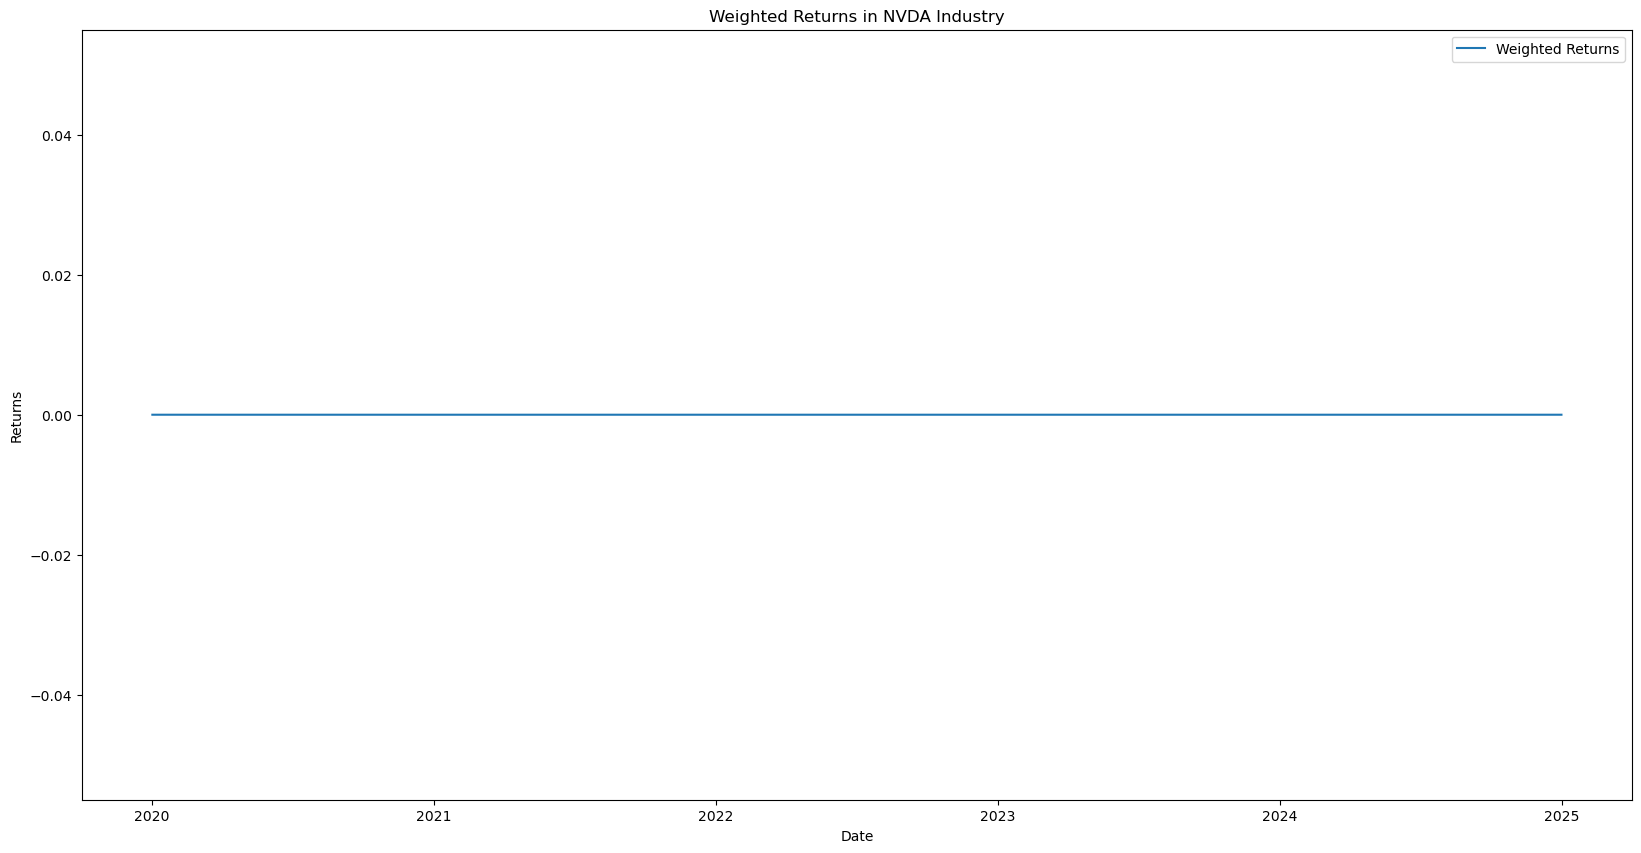

In [140]:
plt.figure(figsize=(20, 10))
plt.plot(df_weighted_returns.index, df_weighted_returns['Weighted Returns'], label='Weighted Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Weighted Returns in NVDA Industry')
plt.legend()
plt.show()

In [141]:
X = sm.add_constant(df_weighted_returns['Weighted Returns'])

Y = df_nvda_industry_log_returns['NVDA']

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   NVDA   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 01 Feb 2025   Prob (F-statistic):                nan
Time:                        03:01:24   Log-Likelihood:                 2480.3
No. Observations:                1258   AIC:                            -4959.
Df Residuals:                    1257   BIC:                            -4954.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0025      0.001  

c:\Users\saiki\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
